# ADWIN implementation

In [ ]:
"""

Purpose: Implementation of ADWIN.

input: x --> Input vector
       del --> Delta value
       Wsize --> Window size

output: plot of the window size, the average and the random-generated series.

dependency: numpy, statistics, matplot

"""

## 1.- Libraries

In [1]:
# 1.- Import necessary libraries
import numpy as np
import statistics as s
from matplotlib import pyplot as plt

## 2.- Input definition

In [2]:
x = np.concatenate((np.random.normal(size = 100), np.random.exponential(size = 100)))
delta = 0.05
Wsize = 5

## 3.- Epsilon funciton

In [8]:
def epsilon(w0,w1, delta):
    card = len(w0) + len(w1)
    return np.sqrt((1/(2*s.harmonic_mean([len(w0),len(w1)])))*np.log(4*card/delta))

## 4.- Algorithm main

In [11]:
# Window initialization
W = []
for i in range(Wsize-1):
    W.append(x[i])

# Algorithm implementation

change = 0   
avg = [0,0,0,0]
Wsize_ = [0,0,0,0]

for i in range(len(x)-5):
    W.append(x[i])
    w0 = []
    w0.append(W[0])
    w1 = W[1:len(W)]
    j = 0
    while j < len(W)-2:
        if abs(np.mean(w0)-np.mean(w1))>epsilon(w0,w1,delta):
            if change == 0:
#                 print("Elements ", i-len(W) + 5, " - ", i + 5, " have average of ", np.mean(W))
                change =1
                
            W = W[1:len(W)]
            w0 = []
            w0.append(W[0])
            w1 = W[1:len(W)]
            j = 0
        else:
            w0.append(w1[0])
            w1 = np.delete(w1,0)
            j += 1
    change = 0
    avg.append(np.mean(W))
    Wsize_.append(len(W))
#     print("Window size is ", len(W), " Average is ", np.mean(W))
# print("Elements ", i-len(W) + 5, " - ", i + 5, " have average of ", np.mean(W))            

## 5.- Output plot

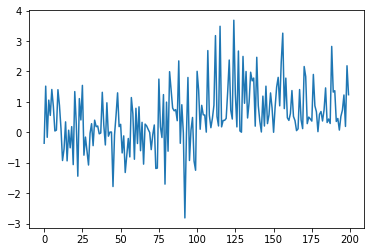

In [12]:
# Original
plt.plot(x)
plt.show()

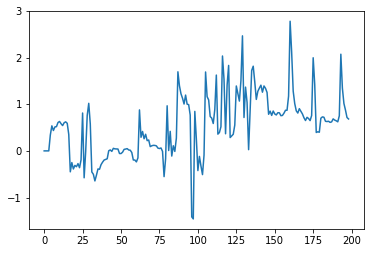

In [13]:
# Estimated
plt.plot(avg)
plt.show()

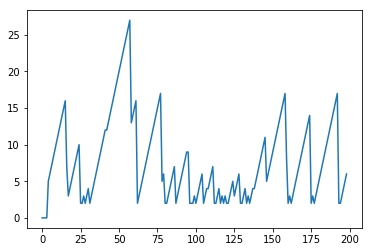

In [14]:
# Window size
plt.plot(Wsize_)
plt.show()